# Correr experimentos
En este archivo está el código para correr los experimentos y escribir los resultados en archivos CSV.
> Los archivos se guardan en la carpeta _resultados_.

In [67]:
import math, subprocess
import numpy as np
import pandas as pd
import time
import filecmp
#from IPython.core.debugger import set_trace
#set_trace()
from os import listdir, getcwd
from os.path import isfile, join
import matplotlib.pyplot as plt
from matplotlib import cm

La siguiente función sirve para correr el código sobre una instancia particular.
- TA: Test aleatorio

In [53]:
def correr_experimento(archivo_instancia, p):
    start = time.time()
    
    # Crear proceso para ejecutar el codigo.
    output_dir = join(getcwd(), 'resultados')
    process = subprocess.Popen(["../src/tp1.exe", archivo_instancia, str(p)], cwd=output_dir)

    # Correr experimento.
    exit_code = process.wait()

    # Verificar que el proceso no fallo.
    if exit_code != 0: raise(Exception(F"Hubo un error en la experimentacion para el algoritmo con la instancia {archivo_instancia}."))
    
    end = time.time()
    return end-start;

## Ejecutar los experimentos.
Este paso puede tardar unos minutos hasta terminar de ejecutarse.

In [116]:
experimentos = [];
#experimentos.append(("../../tests/test_15_segundos.txt", 0.9))
#experimentos.append(("../../tests/test_30_segundos.txt", 0.8))
#experimentos.append(("../../tests/test_aleatorio_desordenado.txt", 0.76))
#experimentos.append(("../../tests/test_completo.txt", 0.5))
#experimentos.append(("../../tests/test_sin_links.txt", 0.64))
#experimentos.append(("../../tests/test_trivial.txt", 0.3))
#######################################
#experimentos.append(("../instancias/3 Principales/1000_paginas_200_links_P_0.7.txt", 0.7))
#experimentos.append(("../instancias/3 Principales/1000_paginas_400_links_P_0.7.txt", 0.7))
#experimentos.append(("../instancias/3 Principales/1000_paginas_600_links_P_0.7.txt", 0.7))
#experimentos.append(("../instancias/3 Principales/1000_paginas_800_links_P_0.7.txt", 0.7))
#experimentos.append(("../instancias/3 Principales/1000_paginas_1000_links_P_0.7.txt", 0.7))
#######################################
#experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.0.txt", 0.0))
#experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.2.txt", 0.2))
#experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.4.txt", 0.4))
#experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.6.txt", 0.6))
#experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_0.8.txt", 0.8))
#experimentos.append(("../instancias/3 Principales/1000_paginas_500_links_P_1.txt", 1.0))
#######################################
#experimentos.append(("../instancias/3 Principales y Anillo/832_Inicio_1000_paginas_P_0.7.txt", 0.7))
#experimentos.append(("../instancias/3 Principales y Anillo/899_Inicio_1000_paginas_P_0.7.txt", 0.7))
#experimentos.append(("../instancias/3 Principales y Anillo/959_Inicio_1000_paginas_P_0.7.txt", 0.7))
#experimentos.append(("../instancias/3 Principales y Anillo/994_Inicio_1000_paginas_P_0.7.txt", 0.7))
#######################################
#experimentos.append(("../instancias/3 Principales Apuntando a otra/1_apuntando_1000_paginas_500_links_P_0.7.txt", 0.7))
#experimentos.append(("../instancias/3 Principales Apuntando a otra/2_apuntando_1000_paginas_500_links_P_0.7.txt", 0.7))
#experimentos.append(("../instancias/3 Principales Apuntando a otra/3_apuntando_1000_paginas_500_links_P_0.7.txt", 0.7))
#######################################

experimentos.append(("..\\..\\tests\\test_15_segundos.txt", 0.9))
experimentos.append(("..\\..\\tests\\test_30_segundos.txt", 0.8))
experimentos.append(("..\\..\\tests\\test_aleatorio_desordenado.txt", 0.76))
experimentos.append(("..\\..\\tests\\test_completo.txt", 0.5))
experimentos.append(("..\\..\\tests\\test_sin_links.txt", 0.64))
experimentos.append(("..\\..\\tests\\test_trivial.txt", 0.3))

In [117]:
numero_de_experimento = 1
numero_de_repeticiones = 1 # Aumentar para mayor precisión con los tiempos
for (archivo, p) in experimentos:
    
    # Voy mostrando que experimento se esta ejecutando.
    print('Corriendo experimento: %i/%i (%s)' % (numero_de_experimento, len(experimentos), archivo))
    
    tiempos = []
    for repeticion in range(numero_de_repeticiones):
        tiempo_de_ejecucion = correr_experimento(archivo, p);
        tiempos.append(tiempo_de_ejecucion)
    
    #print('Estadísticas de los tiempos de ejecución:')
    #print(pd.Series(tiempos).describe())
    
    numero_de_experimento += 1

Corriendo experimento: 1/6 (..\..\tests\test_15_segundos.txt)
Corriendo experimento: 2/6 (..\..\tests\test_30_segundos.txt)
Corriendo experimento: 3/6 (..\..\tests\test_aleatorio_desordenado.txt)
Corriendo experimento: 4/6 (..\..\tests\test_completo.txt)
Corriendo experimento: 5/6 (..\..\tests\test_sin_links.txt)
Corriendo experimento: 6/6 (..\..\tests\test_trivial.txt)


## Experimento 3

Comparamos los resultados con los de la cátedra y los graficamos

In [185]:
resultados = [f for f in listdir("resultados") if isfile(join("resultados", f))]
esperados = [f for f in listdir("resultados_esperados") if isfile(join("resultados_esperados", f))]
common_elements = list(set(resultados).intersection(set(esperados)))
diferencias_map = {}
for name in common_elements:
    print(">>>>>> Comparado el archivo %s" % (name))
    resultado = open(join("resultados", name))
    esperado = open(join("resultados_esperados", name))
    lineas_resultado = resultado.readlines()
    lineas_esperado = esperado.readlines()
    if len(lineas_resultado) != len(lineas_esperado):
        print("No contienen la misma cantidad de lineas.")
        continue
    if len(lineas_resultado) == 0:
        print("Los archivos están vacíos.")
        continue
    if lineas_resultado[0] != lineas_esperado[0]:
        print("Los P utilizados son distintos por lo que no tiene sentido comparar.")
        continue
    diferencias = []
    for i in range(len(lineas_resultado)):
        if abs(float(lineas_resultado[i]) - float(lineas_esperado[i])) > 10e-4:
            print("En la linea %i el valor %s del resultado es distinto al valor %s del esperado." % (i, lineas_resultado[i], lineas_esperado[i]))
        diferencias.append(abs(float(lineas_resultado[i]) - float(lineas_esperado[i])))
    diferencias_map[name] = diferencias
print(">>>>>> Terminado de comparar todos los archivos")

>>>>>> Comparado el archivo test_completo.txt.out
>>>>>> Comparado el archivo test_15_segundos.txt.out
>>>>>> Comparado el archivo test_aleatorio_desordenado.txt.out
>>>>>> Comparado el archivo test_sin_links.txt.out
>>>>>> Comparado el archivo test_trivial.txt.out
>>>>>> Comparado el archivo test_30_segundos.txt.out
>>>>>> Terminado de comparar todos los archivos


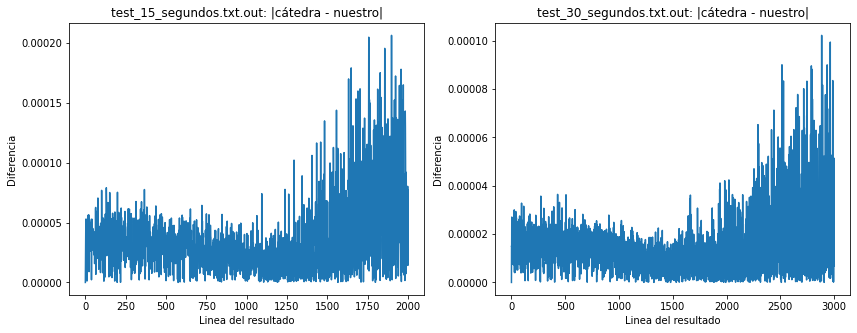

In [195]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(range(1, len(diferencias_map["test_15_segundos.txt.out"]) + 1), diferencias_map["test_15_segundos.txt.out"])
ax1.set_xlabel("Linea del resultado")
ax1.set_ylabel("Diferencia")
ax1.set_title("test_15_segundos.txt.out: |cátedra - nuestro|")
ax2.plot(range(1, len(diferencias_map["test_30_segundos.txt.out"]) + 1), diferencias_map["test_30_segundos.txt.out"])
ax2.set_xlabel("Linea del resultado")
ax2.set_ylabel("Diferencia")
ax2.set_title("test_30_segundos.txt.out: |cátedra - nuestro|")
plt.savefig('./graficos/experimento3.png')
plt.show()
plt.close()

## Experimento 2

Calculamos |Ax-x| y vemos que el máximo sea menor que 10e-4

In [181]:
archivo_entrada = open("..\\tests\\test_30_segundos.txt")
lineas_archivo_entrada = archivo_entrada.readlines()
cant_paginas = int(lineas_archivo_entrada[0])
links = [(int(linea.split(" ")[0]), int(linea.split(" ")[1])) for linea in lineas_archivo_entrada[2:]]
W = np.zeros((cant_paginas, cant_paginas))
for link in links:
    W[link[1]-1, link[0]-1] = 1

archivo_salida = open(".\\resultados\\test_30_segundos.txt.out")
lineas_archivo_salida = archivo_salida.readlines()
p = float(lineas_archivo_salida[0])
x = np.array([float(linea) for linea in lineas_archivo_salida[1:]])
x = np.reshape(x, (cant_paginas, 1))

d = W.sum(axis=0)
d = np.divide(1, d, where=d != 0)
D = np.diag(d)
e = np.ones(cant_paginas)
e = np.reshape(e, (cant_paginas, 1))
z = np.where(d != 0, (1-p)/cant_paginas, 1/cant_paginas)
zt = np.reshape(z, (1, cant_paginas))
A = p * np.matmul(W, D) + np.matmul(e, zt)
diference = np.abs(np.matmul(A, x) - x)

print(diference.max())

print(pd.Series(diference[:, 0]).describe())

9.838638884666667e-05
count    3.000000e+03
mean     1.522058e-05
std      1.176954e-05
min      3.814386e-09
25%      8.505050e-06
50%      1.459979e-05
75%      1.631162e-05
max      9.838639e-05
dtype: float64


## Experimento 4

Puntaje en función de #links

In [30]:
def sumar_arrays(ar1, ar2):
    return [ar1[i]+ar2[i] for i in range(len(ar1))]

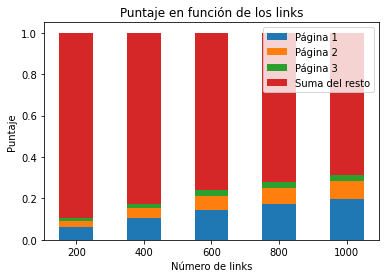

In [33]:
# Grafico de cajas puntaje en función de P de links para las tres páginas principales y la suma del resto
archivos_links = [
    ("./resultados/1000_paginas_200_links_P_0.7.txt.out", 200),
    ("./resultados/1000_paginas_400_links_P_0.7.txt.out", 400),
    ("./resultados/1000_paginas_600_links_P_0.7.txt.out", 600),
    ("./resultados/1000_paginas_800_links_P_0.7.txt.out", 800),
    ("./resultados/1000_paginas_1000_links_P_0.7.txt.out", 1000),
]

links = [200, 400, 600, 800, 1000]
pagina1 = []
pagina2 = []
pagina3 = []
resto = []

for (nombre_archivo, nro_links) in archivos_links:
    archivo = open(nombre_archivo)
    lineas = archivo.readlines()
    p = lineas[0]
    resultado = [float(linea) for linea in lineas[1:]]
    pagina1.append(resultado[0])
    pagina2.append(resultado[1])
    pagina3.append(resultado[2])
    resto.append(sum(resultado[3:]))

# plt.plot(links, pagina1, label="Página 1")
# plt.plot(links, pagina2, label="Página 2")
# plt.plot(links, pagina3, label="Página 3")
# plt.plot(links, resto.values(), label="Suma del resto")
plt.bar(links, pagina1, width=100, label="Página 1")
plt.bar(links, pagina2, width=100, bottom=pagina1, label="Página 2")
plt.bar(links, pagina3, width=100, bottom=sumar_arrays(pagina1, pagina2), label="Página 3")
plt.bar(links, resto, width=100, bottom=sumar_arrays(pagina1, sumar_arrays(pagina2, pagina3)), label="Suma del resto")
plt.xlabel("Número de links")
plt.ylabel("Puntaje")
plt.title("Puntaje en función de los links")
plt.legend()
plt.savefig('./graficos/puntaje_funcion_links.png')
plt.show()
plt.close()

In [36]:
plt.clf()

<Figure size 432x288 with 0 Axes>

## Experimento 5

Puntaje en función de P

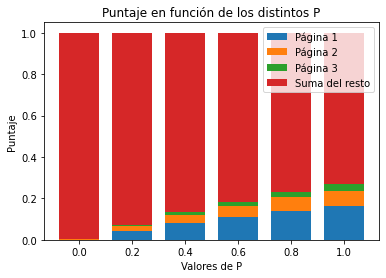

In [32]:
# Grafico de cajas puntaje en función de P para las tres páginas principales y la suma del resto
archivos_links = [
    ("./resultados/1000_paginas_500_links_P_0.0.txt.out", 500),
    ("./resultados/1000_paginas_500_links_P_0.2.txt.out", 500),
    ("./resultados/1000_paginas_500_links_P_0.4.txt.out", 500),
    ("./resultados/1000_paginas_500_links_P_0.6.txt.out", 500),
    ("./resultados/1000_paginas_500_links_P_0.8.txt.out", 500),
    ("./resultados/1000_paginas_500_links_P_1.txt.out", 500),
]

Valores_de_P = [0, 0.2, 0.4, 0.6, 0.8, 1]
pagina1 = []
pagina2 = []
pagina3 = []
resto = []

for (nombre_archivo, ValorP) in archivos_links:
    archivo = open(nombre_archivo)
    lineas = archivo.readlines()
    p = lineas[0]
    resultado = [float(linea) for linea in lineas[1:]]
    pagina1.append(resultado[0])
    pagina2.append(resultado[1])
    pagina3.append(resultado[2])
    resto.append(sum(resultado[3:]))

# plt.plot(links, pagina1, label="Página 1")
# plt.plot(links, pagina2, label="Página 2")
# plt.plot(links, pagina3, label="Página 3")
# plt.plot(links, resto.values(), label="Suma del resto")
plt.bar(Valores_de_P, pagina1, width=0.15, label="Página 1")
plt.bar(Valores_de_P, pagina2, width=0.15, bottom=pagina1, label="Página 2")
plt.bar(Valores_de_P, pagina3, width=0.15, bottom=sumar_arrays(pagina1, pagina2), label="Página 3")
plt.bar(Valores_de_P, resto, width=0.15, bottom=sumar_arrays(pagina1, sumar_arrays(pagina2, pagina3)), label="Suma del resto")
plt.xlabel("Valores de P")
plt.ylabel("Puntaje")
plt.title("Puntaje en función de los distintos P")
plt.legend()
plt.savefig('./graficos/puntaje_Variado_P.png')
plt.show()
plt.close()

## Experimento 6

Puntaje en función del tamaño del anillo

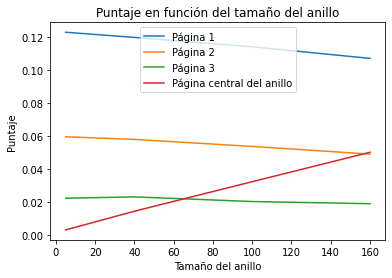

In [45]:
# Grafico de linea puntaje en función de tamaño del anillo para las tres páginas principales y la central
archivos_links = [
    ("./resultados/994_Inicio_1000_paginas_P_0.7.txt.out", 500),
    ("./resultados/959_Inicio_1000_paginas_P_0.7.txt.out", 500),
    ("./resultados/899_Inicio_1000_paginas_P_0.7.txt.out", 500),
    ("./resultados/832_Inicio_1000_paginas_P_0.7.txt.out", 500),
]

tamañoAnillo = [5, 40, 100, 160]
pagina1 = []
pagina2 = []
pagina3 = []
central = []

for (nombre_archivo, links) in archivos_links:
    archivo = open(nombre_archivo)
    lineas = archivo.readlines()
    p = lineas[0]
    resultado = [float(linea) for linea in lineas[1:]]
    pagina1.append(resultado[0])
    pagina2.append(resultado[1])
    pagina3.append(resultado[2])
    central.append(resultado[-1])

plt.plot(tamañoAnillo, pagina1, label="Página 1")
plt.plot(tamañoAnillo, pagina2, label="Página 2")
plt.plot(tamañoAnillo, pagina3, label="Página 3")
plt.plot(tamañoAnillo, central, label="Página central del anillo")
# plt.bar(Valores_de_P, pagina1, width=0.15, label="Página 1")
# plt.bar(Valores_de_P, pagina2, width=0.15, bottom=pagina1, label="Página 2")
# plt.bar(Valores_de_P, pagina3, width=0.15, bottom=sumar_arrays(pagina1, pagina2), label="Página 3")
# plt.bar(Valores_de_P, resto, width=0.15, bottom=sumar_arrays(pagina1, sumar_arrays(pagina2, pagina3)), label="Suma del resto")
plt.xlabel("Tamaño del anillo")
plt.ylabel("Puntaje")
plt.title("Puntaje en función del tamaño del anillo")
plt.legend()
plt.savefig('./graficos/puntaje_Variado_Anillo.png')
plt.show()
plt.close()

## Experimento 7

Cómo le afecta a la página 4 si le apuntan las páginas principales

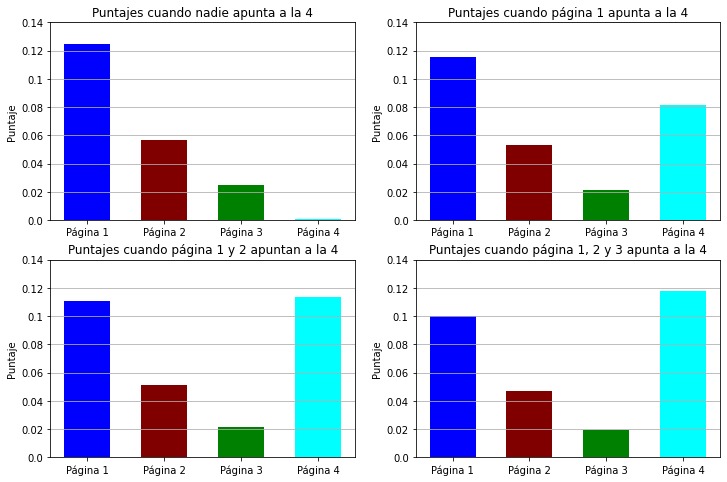

In [101]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,8))

paginas = ["Página 1", "Página 2", "Página 3", "Página 4"]

## Primer gráfico
archivo = open("./resultados/0_apuntando_1000_paginas_500_links_P_0.7.txt.out")
lineas = archivo.readlines()
resultado = [float(linea) for linea in lineas[1:]]
ax1.yaxis.grid()
ax1.bar(paginas, resultado[:4], width=0.6,  color=['blue', 'maroon', 'green', 'cyan'])
ax1.set_ylabel("Puntaje")
ax1.set_title("Puntajes cuando nadie apunta a la 4")
ax1.set_yticks([i for i in np.arange(0, 0.14, 0.02)])
ax1.set_yticklabels([str(i) for i in np.arange(0, 0.14, 0.02)])

## Segundo gráfico
archivo = open("./resultados/1_apuntando_1000_paginas_500_links_P_0.7.txt.out")
lineas = archivo.readlines()
resultado = [float(linea) for linea in lineas[1:]]
ax2.yaxis.grid()
ax2.bar(paginas, resultado[:4], width=0.6,  color=['blue', 'maroon', 'green', 'cyan'])
ax2.set_ylabel("Puntaje")
ax2.set_title("Puntajes cuando página 1 apunta a la 4")
ax2.set_yticks([i for i in np.arange(0, 0.14, 0.02)])
ax2.set_yticklabels([str(i) for i in np.arange(0, 0.14, 0.02)])

## Tercer gráfico
archivo = open("./resultados/2_apuntando_1000_paginas_500_links_P_0.7.txt.out")
lineas = archivo.readlines()
resultado = [float(linea) for linea in lineas[1:]]
ax3.yaxis.grid()
ax3.bar(paginas, resultado[:4], width=0.6,  color=['blue', 'maroon', 'green', 'cyan'])
ax3.set_ylabel("Puntaje")
ax3.set_title("Puntajes cuando página 1 y 2 apuntan a la 4")
ax3.set_yticks([i for i in np.arange(0, 0.14, 0.02)])
ax3.set_yticklabels([str(i) for i in np.arange(0, 0.14, 0.02)])

## Segundo gráfico
archivo = open("./resultados/3_apuntando_1000_paginas_500_links_P_0.7.txt.out")
lineas = archivo.readlines()
resultado = [float(linea) for linea in lineas[1:]]
ax4.yaxis.grid()
ax4.bar(paginas, resultado[:4], width=0.6,  color=['blue', 'maroon', 'green', 'cyan'])
ax4.set_ylabel("Puntaje")
ax4.set_title("Puntajes cuando página 1, 2 y 3 apunta a la 4")
ax4.set_yticks([i for i in np.arange(0, 0.14, 0.02)])
ax4.set_yticklabels([str(i) for i in np.arange(0, 0.14, 0.02)])

# Finalización
plt.savefig('./graficos/experimento7.png')
plt.show()
plt.close()

## Experimento 1

Complejidad temporal en función del número de páginas y la cantidad de links.

In [34]:
# Grafico de cajas puntaje en función de P para las tres páginas principales y la suma del resto
archivos_links = [
    ("./resultados/n_1Links_0.out"),
    ("./resultados/n_1Links_1.out"),
    ("./resultados/n_25Links_1.out"),
    ("./resultados/n_25Links_156.out"),
    ("./resultados/n_25Links_312.out"),
    ("./resultados/n_25Links_469.out"),
    ("./resultados/n_25Links_625.out"),
    ("./resultados/n_50Links_1.out"),
    ("./resultados/n_50Links_625.out"),
    ("./resultados/n_50Links_1250.out"),
    ("./resultados/n_50Links_1875.out"),
    ("./resultados/n_50Links_2500.out"),
    ("./resultados/n_75Links_1.out"),
    ("./resultados/n_75Links_1406.out"),
    ("./resultados/n_75Links_2812.out"),
    ("./resultados/n_75Links_4219.out"),
    ("./resultados/n_75Links_5625.out"),
    ("./resultados/n_100Links_1.out"),
    ("./resultados/n_100Links_2500.out"),
    ("./resultados/n_100Links_5000.out"),
    ("./resultados/n_100Links_7500.out"),
    ("./resultados/n_100Links_10000.out"),
]

In [47]:
experimentos=[]

# experimentos.append(("../instancias/complejidad temporal/n_25Links_156", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_25Links_312", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_25Links_469", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_25Links_625", 0.7))

# experimentos.append(("../instancias/complejidad temporal/n_50Links_625", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_50Links_1250", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_50Links_1875", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_50Links_2500", 0.7))

# experimentos.append(("../instancias/complejidad temporal/n_75Links_1406", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_75Links_2812", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_75Links_4219", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_75Links_5625", 0.7))

# experimentos.append(("../instancias/complejidad temporal/n_100Links_2500", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_100Links_5000", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_100Links_7500", 0.7))
# experimentos.append(("../instancias/complejidad temporal/n_100Links_10000", 0.7))

experimentos.append(("..\\instancias\\complejidad temporal\\n_25Links_156", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_25Links_312", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_25Links_469", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_25Links_625", 0.7))

experimentos.append(("..\\instancias\\complejidad temporal\\n_50Links_625", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_50Links_1250", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_50Links_1875", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_50Links_2500", 0.7))

experimentos.append(("..\\instancias\\complejidad temporal\\n_75Links_1406", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_75Links_2812", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_75Links_4219", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_75Links_5625", 0.7))

experimentos.append(("..\\instancias\\complejidad temporal\\n_100Links_2500", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_100Links_5000", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_100Links_7500", 0.7))
experimentos.append(("..\\instancias\\complejidad temporal\\n_100Links_10000", 0.7))


In [56]:
numero_de_experimento = 0
numero_de_repeticiones = 5 # Aumentar para mayor precisión con los tiempos

matriz_tiempos = np.zeros((5, 5))
for (archivo, p) in experimentos:
    tiempos = []
    
    # Voy mostrando que experimento se esta ejecutando.
    print('Corriendo experimento: %i/%i (%s)' % (numero_de_experimento + 1, len(experimentos), archivo))

    for repeticion in range(numero_de_repeticiones+1):
        tiempo_de_ejecucion = correr_experimento(archivo, p);
        tiempos.append(tiempo_de_ejecucion)

    #print('Estadísticas de los tiempos de ejecución:')
    print(pd.Series(tiempos).describe())
    matriz_tiempos[int(numero_de_experimento / 4)+1][numero_de_experimento % 4 + 1] = pd.Series(tiempos).mean()
    numero_de_experimento=numero_de_experimento+1

Corriendo experimento: 1/16 (..\instancias\complejidad temporal\n_25Links_156)
count    6.000000
mean     0.025092
std      0.005197
min      0.021187
25%      0.021682
50%      0.023453
75%      0.025646
max      0.034987
dtype: float64
Corriendo experimento: 2/16 (..\instancias\complejidad temporal\n_25Links_312)
count    6.000000
mean     0.028653
std      0.001681
min      0.026433
25%      0.027484
50%      0.029009
75%      0.029360
max      0.031012
dtype: float64
Corriendo experimento: 3/16 (..\instancias\complejidad temporal\n_25Links_469)
count    6.000000
mean     0.031966
std      0.000985
min      0.030080
25%      0.032062
50%      0.032092
75%      0.032448
max      0.032911
dtype: float64
Corriendo experimento: 4/16 (..\instancias\complejidad temporal\n_25Links_625)
count    6.000000
mean     0.037170
std      0.000974
min      0.035931
25%      0.036345
50%      0.037409
75%      0.037873
max      0.038250
dtype: float64
Corriendo experimento: 5/16 (..\instancias\compl

In [57]:
print(matriz_tiempos)

[[0.         0.         0.         0.         0.        ]
 [0.         0.02509177 0.02865267 0.03196593 0.03716969]
 [0.         0.03968004 0.09084459 0.15045647 0.20240843]
 [0.         0.08851051 0.26841942 0.56699546 0.83440514]
 [0.         0.20371687 0.81024464 1.56037736 2.21597751]]


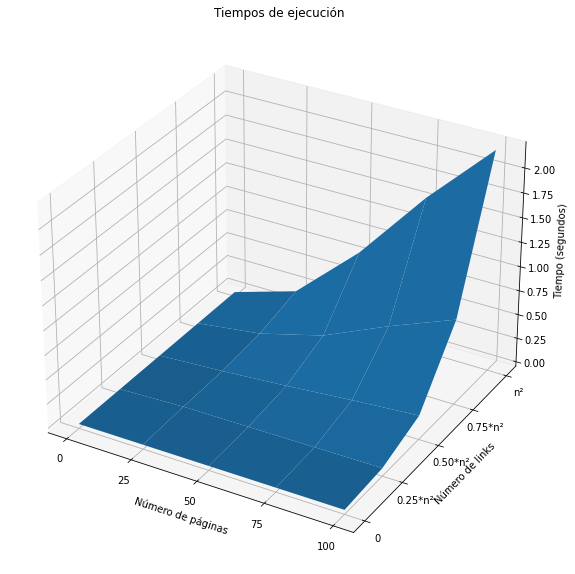

In [114]:
x = [0, 25, 50, 75, 100]
y = [0, .25, .50, .75, 1]
#y=["0","0.25*n²","0.50*n²","0.75*n²","n²"]
x, y = np.meshgrid(x, y)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y,matriz_tiempos, rstride=1, cstride=1)
ax.set_title('Tiempos de ejecución')
ax.set_xlabel("Número de páginas")
ax.set_ylabel("Número de links")
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, .25, .50, .75, 1])
ax.set_yticklabels(["0","0.25*n²","0.50*n²","0.75*n²","n²"])
ax.set_zlabel("Tiempo (segundos)")
plt.savefig('./graficos/tiempos.png')
plt.show()
plt.close()